## Task 3 – Morphological Operators

Use morphological filtering on the mask obtained from Task 2.

a) Successively apply morphological opening and closing on the mask (imopen, imclose).

In [56]:
from matplotlib import pyplot as plt
import cv2
import numpy as np

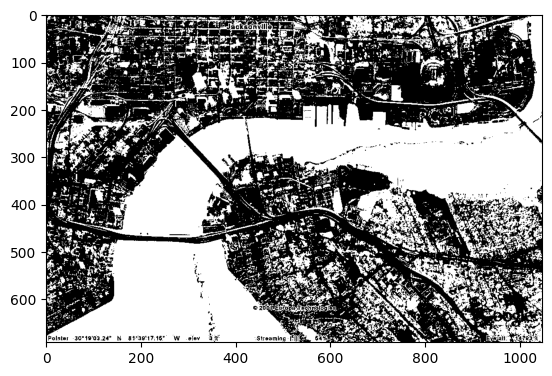

In [57]:
# import the binarized image
img = cv2.imread("Binary_Image.png",cv2.IMREAD_GRAYSCALE)
plt.imshow(img,cmap="gray")
plt.show()

In [58]:
# Define kernel sizes
kernel_size_3 = 3
kernel_size_5 = 5

# Define structuring elements for erosion and dilation
kernel_3 = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_size_3, kernel_size_3))
kernel_5 = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_size_5, kernel_size_5))

# Apply erosion and dilation with 3x3 kernel
eroded_img_3 = cv2.erode(img, kernel_3, iterations=1)
dilated_img_3 = cv2.dilate(img, kernel_3, iterations=1)

# Apply erosion and dilation with 5x5 kernel
eroded_img_5 = cv2.erode(img, kernel_5, iterations=1)
dilated_img_5 = cv2.dilate(img, kernel_5, iterations=1)



Text(0.5, 1.0, 'Original')

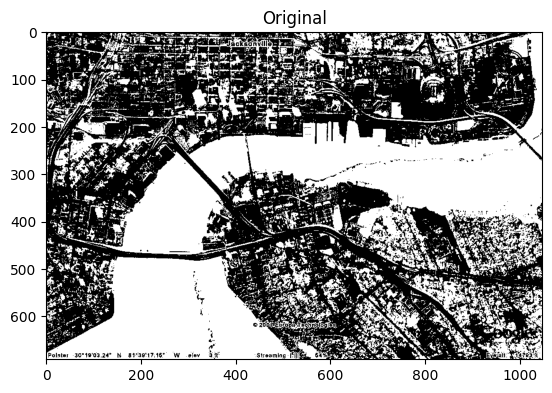

In [59]:
# Show eroded and dilated images
plt.plot()
plt.imshow(img, cmap='gray')
plt.title('Original')


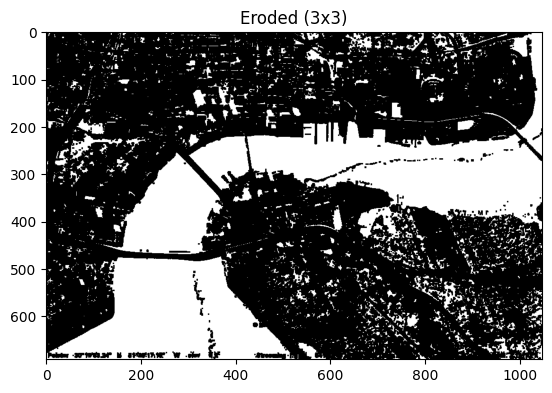

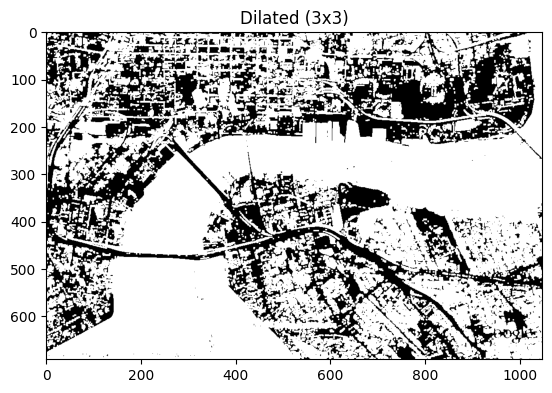

In [60]:
# Show eroded and dilated images
plt.plot()
plt.imshow(eroded_img_3, cmap='gray')
plt.title('Eroded (3x3)')
plt.show()
plt.plot()
plt.imshow(dilated_img_3, cmap='gray')
plt.title('Dilated (3x3)')
plt.show()

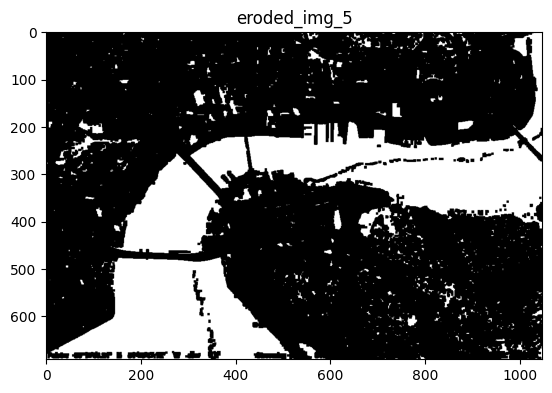

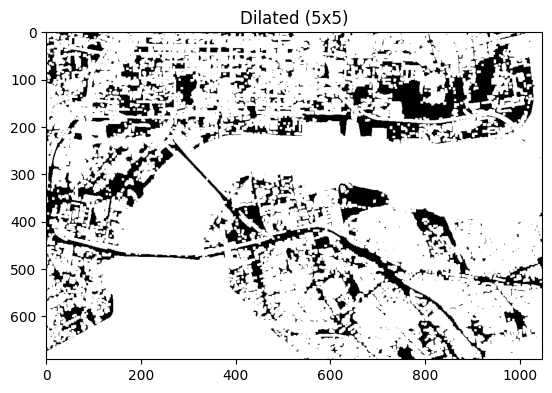

In [61]:
plt.plot()
plt.imshow(eroded_img_5, cmap='gray')
plt.title('eroded_img_5')
plt.show()

plt.plot()
plt.imshow(dilated_img_5, cmap='gray')
plt.title('Dilated (5x5)')
plt.show()

In [62]:
# Apply opening and closing with 3x3 kernel
opened_img_3 = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel_3)
closed_img_3 = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel_3)

# Apply opening and closing with 5x5 kernel
opened_img_5 = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel_5)
closed_img_5 = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel_5)

cv2.imwrite("Filtered_Image.png",eroded_img_5)

True

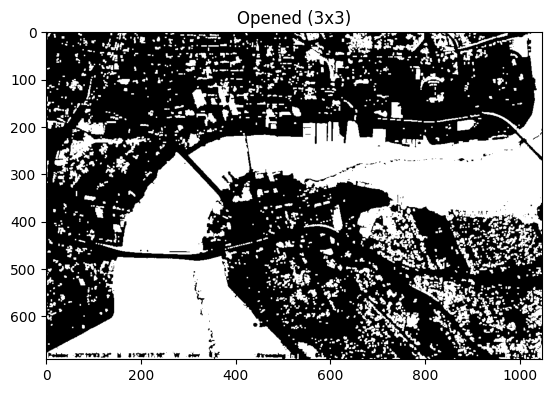

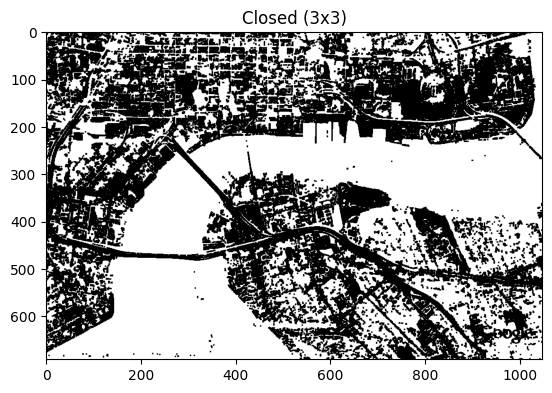

In [63]:
# Show opened and closed images
plt.plot()
plt.imshow(opened_img_3, cmap='gray')
plt.title('Opened (3x3)')
plt.show()
plt.plot()
plt.imshow(closed_img_3, cmap='gray')
plt.title('Closed (3x3)')
plt.show()


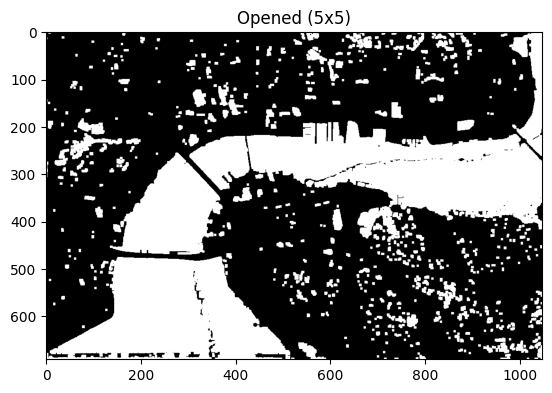

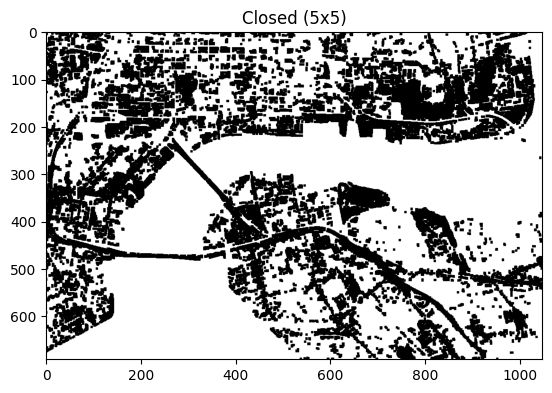

In [64]:
plt.plot()
plt.imshow(opened_img_5, cmap='gray')
plt.title('Opened (5x5)')
plt.show()
plt.plot()
plt.imshow(closed_img_5, cmap='gray')
plt.title('Closed (5x5)')
plt.show()

b) Visualize an overlay of the enhanced image from Task 1 and the morphologically filtered mask.

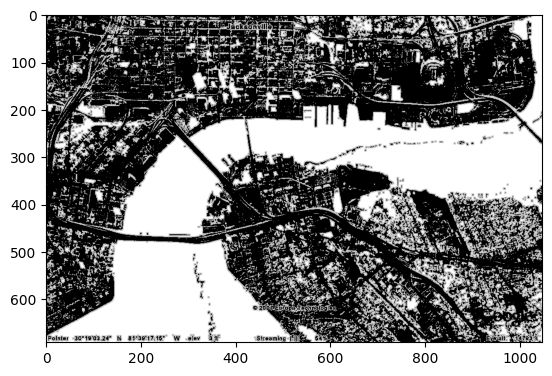

In [65]:
Overlay_enhanced_image = cv2.add(img, eroded_img_5)
plt.figure()
plt.imshow(Overlay_enhanced_image,cmap="gray")
cv2.imwrite("Overlayed_Enhanced_Image.png", Overlay_enhanced_image)
plt.show()


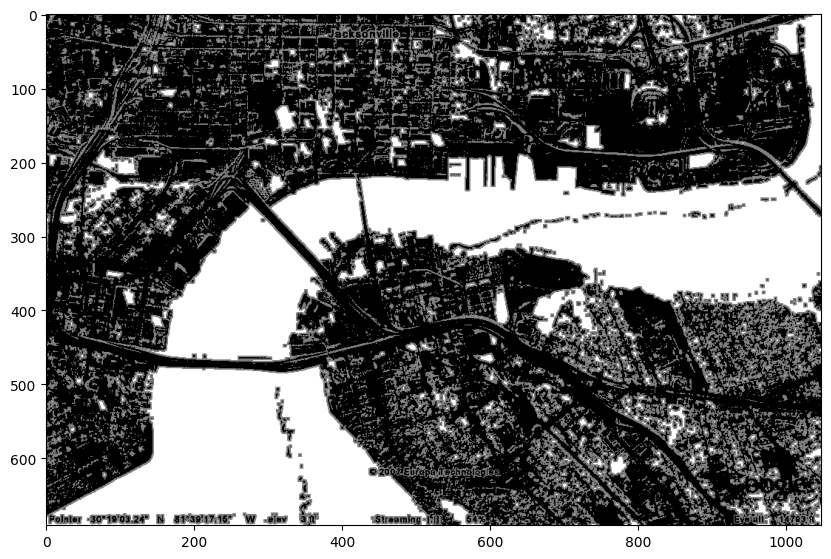

True

In [67]:
# Blend the images using addWeighted function
blended = cv2.addWeighted(img, 0.5, eroded_img_5, 0.5, 0)

# Display the blended image
plt.figure(figsize= (10,10))
plt.imshow(blended,cmap="gray")
plt.show()

# Save the blended image
cv2.imwrite("Overlayed_Image.png", blended)

d) Are the results satisfactory? What are the limitations of this approach for foreground-background
separation?

We can see that the non water surfaces also consists of white pixels. This completely gives the dilemma on identifying the water bodies instintisly. So, due to this I can conclude that the results were satisfactory. Limitation of this approach is that it relies on the assumption that the foreground and background regions can be separated by a threshold value in the original grayscale image. This may not always be the case, especially if the foreground and background regions have similar intensity values or if there are regions of intermediate intensity that are difficult to classify.
erosion adn dilation leads to loss of the identifying data in the image.

e) Test your main function with a different input image of your choice. Do you notice a significant
difference for the chosen input image?

I had tested the main function with difeerent image from the google.
The things I observed were:
1. Histogram diffece from the assignment Image. This leads the difficulties in selection of  threshold values for the binarizatuion. 
2. Still the background whater bodies and some parts in tyhe images are the white. It may be because of the low pixels in the background image.